In [72]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [73]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [74]:
from dictionary.tag_category import tag_category

In [75]:
df = pd.read_csv('../data/6.data_for_model.csv',index_col='title')

In [76]:
df.pop('totalLike')

title
ผัดวุ้นเส้นกระเพราหมูกรอบ     0
ไข่ตุ๋นมาม่า                  5
เกี่ยมอี๋คั่วไส้หมูก้อน       6
ออรินจิคั่วเกลือพริกไทย       4
กระหล่ำปลีทอดน้ำปลา           3
                             ..
สุกี้น้ำกระดูกอ่อน            8
ผัดผักรวมมิตร                 1
ผัดมาม่าต้มยำ                 2
สปาเก็ตตี้ขี้เมาเห็ด          6
เบอร์เกอร์หมูชุ่มฉ่ำ         10
Name: totalLike, Length: 2787, dtype: int64

In [77]:
title = df.index

In [78]:
len(df[df['น้ำปลา'] > 0 ])

773

In [79]:
remove_tag = sum([tag_category[t] for t in tag_category if t not in ['วัตถุดิบ','ประเภทอาหาร','วิธีการ','อาหารเพื่อสุขภาพ']],[])

In [80]:
from dictionary.meat_ingredient import meat_ingredient_list, meat_ingredient

In [81]:
remove_col = [x for x in df if x not in meat_ingredient_list]

In [82]:
df = df.drop(remove_col,axis=1)

In [83]:
for x in meat_ingredient:
  df[x] = 0
  for y in  meat_ingredient[x]:
    df[x] = df[x] + df[y]

In [84]:
remove_col = [x for x in df if x not in meat_ingredient.keys()]

In [85]:
df = df.drop(remove_col, axis=1)

In [86]:
df

,กุ้ง,หมึก,เนื้อ,เครื่องใน,หมู,เนื้อสัตว์แปรรูป,ปลา,ไก่
title,,,,,,,,
ผัดวุ้นเส้นกระเพราหมูกรอบ,0.0,0.0,0,0,220.0,0.0,0.0,0.0
ไข่ตุ๋นมาม่า,0.0,0.0,0,0,0.0,0.0,0.0,100.0
เกี่ยมอี๋คั่วไส้หมูก้อน,0.0,0.0,0,0,200.0,0.0,0.0,100.0
ออรินจิคั่วเกลือพริกไทย,0.0,0.0,0,0,0.0,0.0,0.0,200.0
กระหล่ำปลีทอดน้ำปลา,0.0,0.0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
สุกี้น้ำกระดูกอ่อน,0.0,0.0,0,0,500.0,0.0,0.0,50.0
ผัดผักรวมมิตร,0.0,0.0,0,0,0.0,90.0,0.0,0.0
ผัดมาม่าต้มยำ,0.0,0.0,0,0,0.0,0.0,0.0,50.0


In [87]:
# arr = []

# for x in df:
#   arr.append(len(df[df[x] > 0]))

In [88]:
# q1, q3 = np.quantile(arr,[0.25,0.75])

In [89]:
# for x in df:
#   if len(df[df[x] > 0]) <= q1 or len(df[df[x] > 0]) >= q3:
#     df.drop(x,axis=1)

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [91]:
standardized_data.to_csv('../data/data_for_model_2.csv',index=False)

In [92]:
df = standardized_data
df.head()

,กุ้ง,หมึก,เนื้อ,เครื่องใน,หมู,เนื้อสัตว์แปรรูป,ปลา,ไก่
0,-0.091567,-0.018946,0.0,0.0,0.411112,-0.188266,-0.192028,-0.372069
1,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,0.146571
2,-0.091567,-0.018946,0.0,0.0,0.341026,-0.188266,-0.192028,0.146571
3,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,0.665212
4,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,-0.372069


In [93]:
# n_components = len(df.columns)
# explained_variance = []

# for n in tqdm(range(1, n_components+1)):
#     pca = PCA(n_components=n)
#     pca.fit(df)
#     explained_variance.append(sum(pca.explained_variance_ratio_))

In [94]:
# plt.plot(range(1, n_components+1), explained_variance, '-o')
# plt.xlabel('Number of principal components')
# plt.ylabel('Explained variance ratio')
# plt.xlim(1,10)
# plt.show()

In [95]:
best_n = 4

In [96]:
pca = PCA(n_components=best_n)
principal_components = pca.fit_transform(df)

In [97]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4'])

In [98]:
# principal_df.insert(0,'title',df.index)

In [99]:
principal_df

,PC1,PC2,PC3,PC4
0,0.569247,0.063033,-0.103975,0.032377
1,-0.258595,-0.128966,0.184847,0.080658
2,0.293487,-0.177041,0.206506,0.086984
3,-0.479146,-0.373847,0.497495,0.135898
4,-0.038044,0.115915,-0.127800,0.025418
...,...,...,...,...
2782,1.231886,-0.126713,0.082671,0.068854
2783,-0.470746,-0.668750,-1.489118,-0.486304
2784,-0.148319,-0.006525,0.028524,0.053038
2785,0.790079,0.043803,-0.095312,0.034908


In [100]:
linkage_matrix = linkage(df, 'ward')

In [101]:
# dendrogram(linkage_matrix)
# plt.ylim(0,10000)
# plt.show()

In [102]:
num_clusters = 100

In [103]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [104]:
clusters.shape

(2787,)

In [105]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=clusters)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.show()

In [106]:
food_clusters = [[] for _ in range(num_clusters)]

In [107]:
for i,x in enumerate(clusters):
  print(i,x)
  food_clusters[x-1].append(title[i])

0 86
1 79
2 89
3 49
4 72
5 72
6 72
7 86
8 81
9 84
10 59
11 60
12 86
13 79
14 72
15 53
16 86
17 89
18 67
19 72
20 72
21 60
22 86
23 67
24 86
25 86
26 79
27 30
28 72
29 79
30 79
31 41
32 74
33 30
34 49
35 67
36 92
37 79
38 83
39 79
40 79
41 72
42 78
43 90
44 58
45 73
46 72
47 80
48 79
49 25
50 86
51 72
52 34
53 68
54 67
55 84
56 86
57 89
58 32
59 44
60 16
61 77
62 72
63 72
64 73
65 86
66 16
67 67
68 79
69 73
70 39
71 72
72 72
73 86
74 34
75 86
76 80
77 67
78 16
79 73
80 84
81 16
82 48
83 85
84 24
85 34
86 86
87 67
88 79
89 81
90 86
91 79
92 84
93 69
94 50
95 89
96 72
97 59
98 67
99 79
100 79
101 72
102 75
103 72
104 79
105 49
106 79
107 72
108 48
109 81
110 72
111 72
112 62
113 14
114 54
115 51
116 58
117 85
118 73
119 72
120 79
121 67
122 73
123 96
124 73
125 79
126 73
127 72
128 73
129 92
130 78
131 83
132 86
133 73
134 72
135 72
136 49
137 68
138 67
139 72
140 81
141 67
142 58
143 81
144 73
145 79
146 96
147 72
148 72
149 67
150 79
151 83
152 67
153 72
154 72
155 72
156 83
157 37
158 

In [108]:
[len(x) for x in food_clusters]

[3,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 12,
 4,
 22,
 1,
 6,
 2,
 5,
 2,
 1,
 1,
 5,
 3,
 1,
 2,
 4,
 7,
 21,
 11,
 9,
 2,
 30,
 2,
 4,
 9,
 2,
 9,
 4,
 1,
 1,
 1,
 4,
 14,
 8,
 1,
 36,
 78,
 22,
 45,
 3,
 7,
 30,
 4,
 1,
 5,
 41,
 44,
 24,
 12,
 2,
 1,
 6,
 11,
 1,
 161,
 39,
 36,
 7,
 17,
 681,
 224,
 9,
 29,
 6,
 15,
 89,
 242,
 34,
 87,
 10,
 106,
 37,
 44,
 182,
 9,
 19,
 33,
 8,
 1,
 34,
 10,
 2,
 1,
 8,
 1,
 1,
 1,
 1]

In [109]:
food_clusters[26]

['ยำวุ้นเส้นโบราณ', 'หล่อไมไก๊ด']

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator
from yellowbrick.cluster.elbow import kelbow_visualizer

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

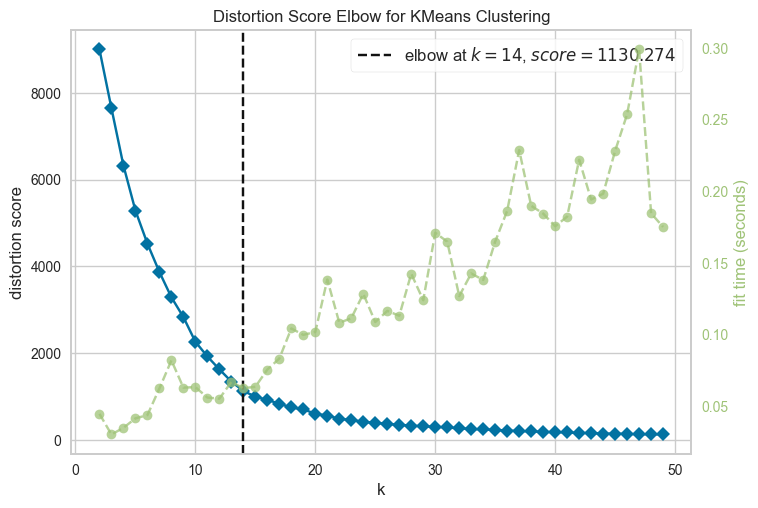

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=49), k=(2, 50))

In [111]:
kelbow_visualizer(KMeans(), principal_df, k=(2,50))


In [112]:
scaler = StandardScaler()

array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)

In [113]:
df_normalized.describe()

,0,1,2,3,4,5,6,7
count,2.787000e+03,2.787000e+03,2787.0,2787.0,2.787000e+03,2.787000e+03,2.787000e+03,2.787000e+03
mean,-3.059387e-17,-5.098979e-18,0.0,0.0,2.549490e-18,1.147270e-17,-5.098979e-18,1.019796e-17
std,1.000179e+00,1.000179e+00,0.0,0.0,1.000179e+00,1.000179e+00,1.000179e+00,1.000179e+00
min,-9.156733e-02,-1.894565e-02,0.0,0.0,-3.598319e-01,-1.882656e-01,-1.920276e-01,-3.720693e-01
25%,-9.156733e-02,-1.894565e-02,0.0,0.0,-3.598319e-01,-1.882656e-01,-1.920276e-01,-3.720693e-01
50%,-9.156733e-02,-1.894565e-02,0.0,0.0,-3.598319e-01,-1.882656e-01,-1.920276e-01,-3.720693e-01
75%,-9.156733e-02,-1.894565e-02,0.0,0.0,6.068286e-02,-1.882656e-01,-1.920276e-01,1.465712e-01
max,3.149192e+01,5.278257e+01,0.0,0.0,3.468306e+01,2.163229e+01,1.996115e+01,3.074636e+01


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

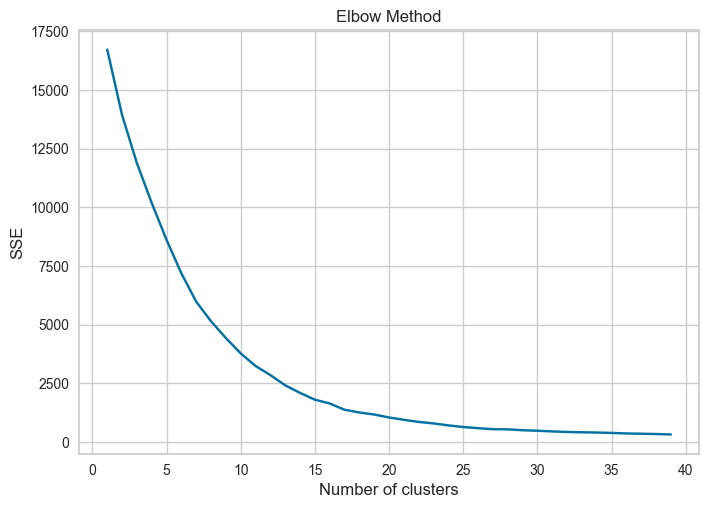

In [114]:
max_k = 40
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [115]:
from sklearn.metrics import silhouette_score

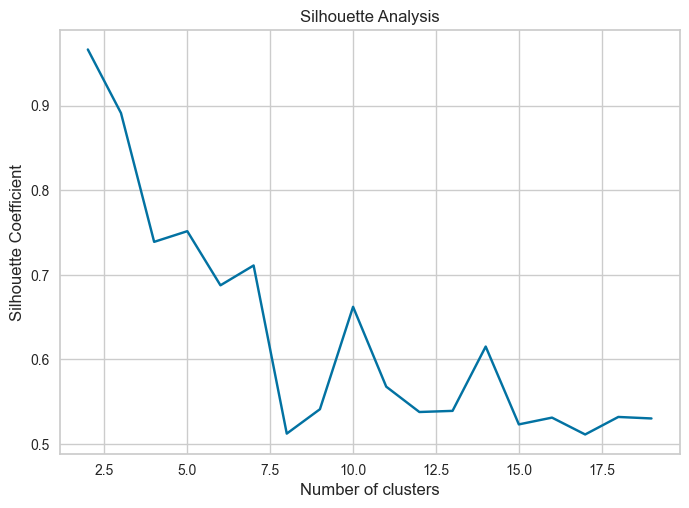

In [116]:
silhouette_scores = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the Silhouette scores
plt.plot(range(2, 20), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


In [117]:
# Choose value for k
k = 14
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,กุ้ง,หมึก,เนื้อ,เครื่องใน,หมู,เนื้อสัตว์แปรรูป,ปลา,ไก่,cluster_id
0,-0.091567,-0.018946,0.0,0.0,0.411112,-0.188266,-0.192028,-0.372069,13
1,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,0.146571,0
2,-0.091567,-0.018946,0.0,0.0,0.341026,-0.188266,-0.192028,0.146571,13
3,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,0.665212,10
4,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,-0.372069,0
...,...,...,...,...,...,...,...,...,...
2782,-0.091567,-0.018946,0.0,0.0,1.392313,-0.188266,-0.192028,-0.112749,13
2783,-0.091567,-0.018946,0.0,0.0,-0.359832,1.775585,-0.192028,-0.372069,4
2784,-0.091567,-0.018946,0.0,0.0,-0.359832,-0.188266,-0.192028,-0.112749,0
2785,-0.091567,-0.018946,0.0,0.0,0.691455,-0.188266,-0.192028,-0.372069,13


In [118]:
for x in range(k):
  print(len(df[df['cluster_id'] == x]))

1539
9
1
34
113
19
53
1
1
11
343
3
120
540


In [125]:
for x in df[df['cluster_id'] == 8].index:
  print(title[x])

กระเพาะปลา
